In [1]:
import os
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.preprocessing import LabelEncoder

#### Setting the directories the read the images from

In [2]:
base_dir = os.getcwd()
print(base_dir)
train_dir = os.path.join(base_dir, 'logos3\\train')
print(train_dir)
test_dir = os.path.join(base_dir, 'logos3\\test')
print(test_dir)

C:\Users\admin\Documents\ISB AMPBA\Residency 4\Deep Learning\Assignment
C:\Users\admin\Documents\ISB AMPBA\Residency 4\Deep Learning\Assignment\logos3\train
C:\Users\admin\Documents\ISB AMPBA\Residency 4\Deep Learning\Assignment\logos3\test


#### Reading a few images to check. 

directory_path:  C:\Users\admin\Documents\ISB AMPBA\Residency 4\Deep Learning\Assignment\logos3\test\Burger King
Image_path:  C:\Users\admin\Documents\ISB AMPBA\Residency 4\Deep Learning\Assignment\logos3\test\Burger King\armada_image_100.jpg
Image_path:  C:\Users\admin\Documents\ISB AMPBA\Residency 4\Deep Learning\Assignment\logos3\test\Burger King\armada_image_100_2.jpg
Image_path:  C:\Users\admin\Documents\ISB AMPBA\Residency 4\Deep Learning\Assignment\logos3\test\Burger King\armada_image_101.jpg
Image_path:  C:\Users\admin\Documents\ISB AMPBA\Residency 4\Deep Learning\Assignment\logos3\test\Burger King\armada_image_102.jpg
Image_path:  C:\Users\admin\Documents\ISB AMPBA\Residency 4\Deep Learning\Assignment\logos3\test\Burger King\armada_image_103.jpg
directory_path:  C:\Users\admin\Documents\ISB AMPBA\Residency 4\Deep Learning\Assignment\logos3\test\KFC
Image_path:  C:\Users\admin\Documents\ISB AMPBA\Residency 4\Deep Learning\Assignment\logos3\test\KFC\armada_image_163.jpg
Image_pa

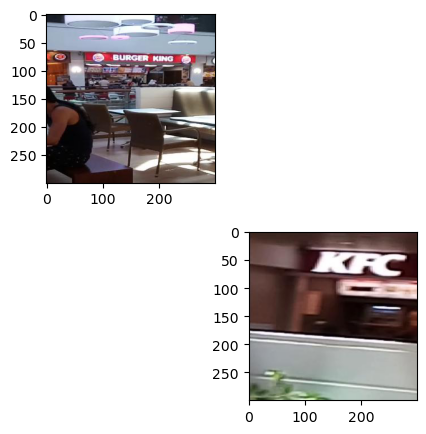

In [3]:
# plot photos from dataset
from matplotlib import pyplot
from matplotlib.image import imread

directory = ['Burger King', 'KFC', 'McDonalds', 'Starbucks', 'Subway']
img_cnt = 0

pyplot.figure(figsize=(10,8))
# define location of dataset
# plot few images
for i in directory[0:2]:
	# define subplot
    pyplot.subplot(340 + 1 + img_cnt)
    
    directory_path = os.path.join(test_dir, i)
    print("directory_path: ", directory_path)
    
    files = os.listdir(directory_path)
    for file in files[:5]:
        image_path = os.path.join(directory_path, file)
        print("Image_path: ", image_path)
        # load image pixels
        image = imread(image_path)
        # plot raw pixel data
        pyplot.imshow(image)
        img_cnt = img_cnt + 1
            
# show the figure
pyplot.show()

#### Loading the pre-trained model VGG16

img_path:  C:\Users\admin\Documents\ISB AMPBA\Residency 4\Deep Learning\Assignment\logos3\test\Burger King\armada_image_100.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step


[[('n04200800', 'shoe_shop', 0.20824726),
  ('n04443257', 'tobacco_shop', 0.05414344),
  ('n03602883', 'joystick', 0.03851478),
  ('n02776631', 'bakery', 0.035867747),
  ('n04264628', 'space_bar', 0.035166673)]]

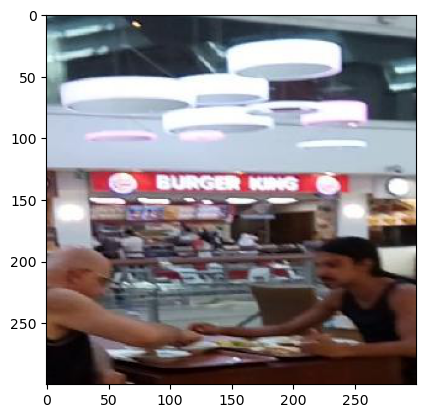

In [4]:
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.imagenet_utils import preprocess_input
from keras.applications.imagenet_utils import decode_predictions
from keras.layers import Dense, Activation, Flatten
from keras.layers import InputLayer
from keras.models import Model
import keras.utils as utils
from sklearn.utils import shuffle

model = VGG16(include_top=True,weights='imagenet')
img_path = os.path.join(test_dir, 'Burger King') + '\\armada_image_100.jpg'
print("img_path: ", img_path)
BK = imread(img_path)
pyplot.imshow(BK)

img = image.load_img(img_path,target_size=(224,224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
pred = model.predict(x)
decode_predictions(pred)

#### Creating the Train and Test set

In [5]:
img_data_list=[]
label_list=[]
directory = ['Burger King', 'KFC', 'McDonalds', 'Starbucks', 'Subway']

for i in directory:
    img_cnt = 0
    directory_path = os.path.join(train_dir, i)
    files = os.listdir(directory_path)
    for file in files:
        img_path = os.path.join(directory_path, file)
        img = image.load_img(img_path, target_size=(224, 224))
        X_train = image.img_to_array(img)
        X_train = np.expand_dims(X_train, axis=0)
        X_train = preprocess_input(X_train)
        img_data_list.append(X_train)
        label_list.append(i)
        img_cnt = img_cnt + 1
    print("No of Images for {0} is {1}.".format(i,img_cnt))

img_data = np.array(img_data_list)
print ("img_data shape: ", img_data.shape)
img_data=np.rollaxis(img_data,1,0)
print ("img_data shape: ", img_data.shape)
img_data=img_data[0]
print ("img_data[0] shape: ",img_data.shape)

# convert class labels to on-hot encoding
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(label_list)
Y = tf.keras.utils.to_categorical(encoded_labels, 5)

#Shuffle the dataset
X_train,y_train = shuffle(img_data,Y, random_state=2)

No of Images for Burger King is 297.
No of Images for KFC is 70.
No of Images for McDonalds is 189.
No of Images for Starbucks is 233.
No of Images for Subway is 124.
img_data shape:  (913, 1, 224, 224, 3)
img_data shape:  (1, 913, 224, 224, 3)
img_data[0] shape:  (913, 224, 224, 3)


In [6]:
img_data_list=[]
label_list=[]
directory = ['Burger King', 'KFC', 'McDonalds', 'Starbucks', 'Subway']

for i in directory:
    img_cnt = 0
    directory_path = os.path.join(test_dir, i)
    files = os.listdir(directory_path)
    for file in files:
        img_path = os.path.join(directory_path, file)
        img = image.load_img(img_path, target_size=(224, 224))
        X_test = image.img_to_array(img)
        X_test = np.expand_dims(X_test, axis=0)
        X_test = preprocess_input(X_test)
        img_data_list.append(X_test)
        label_list.append(i)
        img_cnt = img_cnt + 1
    print("No of Images for {0} is {1}.".format(i,img_cnt))

img_data = np.array(img_data_list)
print ("img_data shape: ", img_data.shape)
img_data=np.rollaxis(img_data,1,0)
print ("img_data shape: ", img_data.shape)
img_data=img_data[0]
print ("img_data[0] shape: ",img_data.shape)

# convert class labels to on-hot encoding
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(label_list)
Y = tf.keras.utils.to_categorical(encoded_labels, 5)
#Shuffle the dataset
X_test,y_test = shuffle(img_data,Y, random_state=2)

No of Images for Burger King is 153.
No of Images for KFC is 20.
No of Images for McDonalds is 96.
No of Images for Starbucks is 38.
No of Images for Subway is 29.
img_data shape:  (336, 1, 224, 224, 3)
img_data shape:  (1, 336, 224, 224, 3)
img_data[0] shape:  (336, 224, 224, 3)


#### Freezing top layers of vgg16 and Adjusting last layer for our classification problem

In [11]:
## Customize the base VGG-16
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
model.summary()
# Freeze the weights of the pre-trained layers
for layer in base_model.layers:
    layer.trainable = False
# Add a new fully connected layer with appropriate number of output nodes
x = Flatten()(base_model.output)
x = Dense(25, activation='relu')(x)        # Add your desired number of nodes
output = Dense(5, activation='softmax')(x)  # 5 output nodes for 5 classes

# Create the new model with modified top
customvgg16_model = Model(inputs=base_model.input, outputs=output)

# Compile the model
customvgg16_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model (replace train_data and train_labels with your training data)
customvgg16_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc1 (Dense)                     │ (None, 4096)           │   102,764,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc2 (Dense)                     │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ predictions (Dense)             │ (None, 1000)           │     4,097,000 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 138,357,544 (527.79 MB)

 Trainable params: 138,357,544 (527.79 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
29/29 ━━━━━━━━━━━━━━━━━━━━ 366s 12s/step - accuracy: 0.4093 - loss: 7.0925 - val_accuracy: 0.1607 - val_loss: 2.2117
Epoch 2/5
29/29 ━━━━━━━━━━━━━━━━━━━━ 363s 13s/step - accuracy: 0.7512 - loss: 0.7726 - val_accuracy: 0.3661 - val_loss: 3.7251
Epoch 3/5
29/29 ━━━━━━━━━━━━━━━━━━━━ 363s 13s/step - accuracy: 0.8711 - loss: 0.3189 - val_accuracy: 0.3750 - val_loss: 1.7839
Epoch 4/5
29/29 ━━━━━━━━━━━━━━━━━━━━ 345s 12s/step - accuracy: 0.8981 - loss: 0.2101 - val_accuracy: 0.3780 - val_loss: 3.4618
Epoch 5/5
29/29 ━━━━━━━━━━━━━━━━━━━━ 363s 12s/step - accuracy: 0.9340 - loss: 0.1566 - val_accuracy: 0.3810 - val_loss: 5.0008


In [13]:
## Customize the base VGG-16
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
model.summary()
# Freeze the weights of the pre-trained layers
for layer in base_model.layers:
    layer.trainable = False
# Add a new fully connected layer with appropriate number of output nodes
x = Flatten()(base_model.output)
x = Dense(128, activation='relu')(x)        # Add your desired number of nodes
output = Dense(5, activation='softmax')(x)  # 5 output nodes for 5 classes

# Create the new model with modified top
customvgg16_model = Model(inputs=base_model.input, outputs=output)

# Compile the model
customvgg16_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model (replace train_data and train_labels with your training data)
customvgg16_model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test))

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc1 (Dense)                     │ (None, 4096)           │   102,764,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc2 (Dense)                     │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ predictions (Dense)             │ (None, 1000)           │     4,097,000 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 138,357,544 (527.79 MB)

 Trainable params: 138,357,544 (527.79 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
29/29 ━━━━━━━━━━━━━━━━━━━━ 385s 12s/step - accuracy: 0.6210 - loss: 19.8534 - val_accuracy: 0.4554 - val_loss: 7.9408
Epoch 2/5
29/29 ━━━━━━━━━━━━━━━━━━━━ 334s 12s/step - accuracy: 0.9602 - loss: 0.5414 - val_accuracy: 0.3661 - val_loss: 18.7439
Epoch 3/5
29/29 ━━━━━━━━━━━━━━━━━━━━ 325s 11s/step - accuracy: 0.9873 - loss: 0.0752 - val_accuracy: 0.4256 - val_loss: 10.8186
Epoch 4/5
29/29 ━━━━━━━━━━━━━━━━━━━━ 323s 11s/step - accuracy: 0.9883 - loss: 0.0869 - val_accuracy: 0.3482 - val_loss: 14.3686
Epoch 5/5
29/29 ━━━━━━━━━━━━━━━━━━━━ 322s 11s/step - accuracy: 1.0000 - loss: 3.3656e-04 - val_accuracy: 0.3899 - val_loss: 13.7574
